In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

airbnb = pd.read_csv('/content/drive/MyDrive/airbnb.csv')
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [2]:
airbnb.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   coordinates         10019 non-null  object 
 7   room_type           10019 non-null  object 
 8   price               9781 non-null   object 
 9   number_of_reviews   10019 non-null  int64  
 10  last_review         7944 non-null   object 
 11  reviews_per_month   7944 non-null   float64
 12  availability_365    10019 non-null  int64  
 13  rating              7944 non-null   float64
 14  number_of_stays     7944 non-null   float64
 15  5_stars             7944 non-null   float64
 16  list

In [5]:
airbnb.isna().sum()

Unnamed: 0               0
listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

<ipython-input-6-8e6a3739729a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb['rating'], bins = 20)


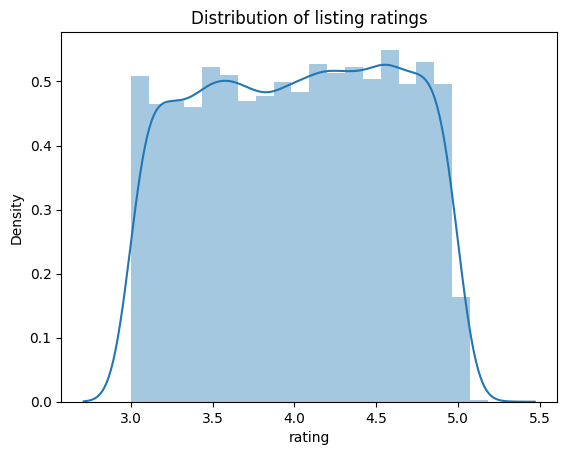

In [6]:
sns.distplot(airbnb['rating'], bins = 20)
plt.title('Distribution of listing ratings')
plt.show()

In [9]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [10]:
airbnb['room_type'].value_counts()

room_type
Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: count, dtype: int64

In [11]:
airbnb['coordinates'] = airbnb['coordinates'].str.replace("(","")
airbnb['coordinates'] = airbnb['coordinates'].str.replace(")","")
airbnb['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [12]:
lat_long = airbnb['coordinates'].str.split(",", expand = True)
lat_long.head()

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [13]:
airbnb['latitude'] = lat_long[0]
airbnb['longitude'] = lat_long[1]
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [14]:
airbnb.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude               object
longitude              object
dtype: object

In [15]:
airbnb['latitude'] = airbnb['latitude'].astype('float')
airbnb['longitude'] = airbnb['longitude'].astype('float')
airbnb.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [16]:
airbnb.drop('coordinates', axis = 1, inplace = True)
airbnb.head()


,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [17]:
airbnb['price'].mean()

TypeError: can only concatenate str (not "int") to str

In [18]:
airbnb['price'] = airbnb['price'].str.strip("$")
airbnb['price'].head()

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [20]:
airbnb['price'] = airbnb['price'].astype('float')
airbnb['price'].mean()

150.90512217564665

In [21]:
airbnb['price'].head()

0     45.0
1    135.0
2    150.0
3     86.0
4    160.0
Name: price, dtype: float64

In [22]:
airbnb[['listing_added', 'last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaN
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [23]:
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'],
format = "%Y-%m-%d")
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format =
"%Y-%m-%d")
airbnb[['listing_added', 'last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaT
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [24]:
print(airbnb[['listing_added', 'last_review']].dtypes)

listing_added    datetime64[ns]
last_review      datetime64[ns]
dtype: object


In [25]:
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [26]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [27]:
airbnb['room_type'] = airbnb['room_type'].str.lower()
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [28]:
airbnb['room_type'] = airbnb['room_type'].str.strip()
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [29]:
mappings = {'private room': 'Private Room', 'private': 'Private Room',
'entire home/apt': 'Entire place', 'shared room': 'Shared room',
'home': 'Entire place'}
airbnb['room_type'] = airbnb['room_type'].replace(mappings)
airbnb['room_type'].unique()

array(['Private Room', 'Entire place', 'Shared room'], dtype=object)

In [31]:
airbnb = airbnb.fillna({'reviews_per_month':0,
                        'number_of_stays':0,
                        '5_stars':0})

is_rated = np.where(airbnb['rating'].isna() == True, 0, 1)
airbnb['is_rated'] = is_rated

1) spilt neighbourhood_full to borough_neighbourhood which means ( borough ) and
( neighbourhood )


In [34]:
airbnb['neighbourhood_full'].head()

0           Brooklyn, Flatlands
1    Manhattan, Upper West Side
2    Brooklyn, Brooklyn Heights
3    Manhattan, Upper West Side
4    Manhattan, Lower East Side
Name: neighbourhood_full, dtype: object

In [36]:
location = airbnb['neighbourhood_full'].str.split(',', expand=True)
location.head()

,0,1
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side


In [37]:
airbnb['borough'] = location[0]
airbnb['neighbourhood'] = location[1]
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,...,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,is_rated,borough,neighbourhood
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private Room,45.0,10,2018-12-12,...,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,1,Brooklyn,Flatlands
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire place,135.0,1,2019-06-30,...,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,1,Manhattan,Upper West Side
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire place,150.0,0,NaT,...,65,NaN,0.0,0.000000,2018-08-15,40.70070,-73.99517,0,Brooklyn,Brooklyn Heights
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire place,86.0,5,2017-09-23,...,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,1,Manhattan,Upper West Side
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private Room,160.0,23,2019-06-12,...,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,1,Manhattan,Lower East Side


2) drop any (rating) > 5.0

In [38]:
rating_filter = airbnb['rating'] > 5.0
airbnb.drop(airbnb[rating_filter].index, inplace=True)
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,...,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,is_rated,borough,neighbourhood
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private Room,45.0,10,2018-12-12,...,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,1,Brooklyn,Flatlands
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire place,135.0,1,2019-06-30,...,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,1,Manhattan,Upper West Side
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire place,150.0,0,NaT,...,65,NaN,0.0,0.000000,2018-08-15,40.70070,-73.99517,0,Brooklyn,Brooklyn Heights
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire place,86.0,5,2017-09-23,...,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,1,Manhattan,Upper West Side
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private Room,160.0,23,2019-06-12,...,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,1,Manhattan,Lower East Side


3) find duplicates in ( listing_id) and remove them

In [39]:
duplicates = airbnb[airbnb.duplicated(['listing_id'], keep=False)]
duplicates.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,...,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,is_rated,borough,neighbourhood
77,77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,"Manhattan, Kips Bay",Entire place,289.0,4,2016-05-22,...,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,1,Manhattan,Kips Bay
368,368,17861841,THE CREATIVE COZY ROOM,47591528,Janessa,"Brooklyn, Sheepshead Bay",Private Room,99.0,13,2019-05-23,...,82,4.806590,15.6,0.937422,2018-11-17,40.59211,-73.94127,1,Brooklyn,Sheepshead Bay
555,555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,"Brooklyn, Prospect-Lefferts Gardens",Entire place,154.0,123,2019-07-01,...,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,1,Brooklyn,Prospect-Lefferts Gardens
1145,1145,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,"Brooklyn, Greenpoint",Entire place,199.0,43,2019-07-02,...,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,1,Brooklyn,Greenpoint
1338,1338,32610834,Manhattan by the water!,12132369,Omar,"Manhattan, Kips Bay",Entire place,150.0,0,NaT,...,9,NaN,0.0,0.000000,2018-06-28,40.73767,-73.97384,0,Manhattan,Kips Bay


In [42]:
airbnb.drop_duplicates('listing_id', inplace = True)

In [43]:
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,...,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,is_rated,borough,neighbourhood
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private Room,45.0,10,2018-12-12,...,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,1,Brooklyn,Flatlands
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire place,135.0,1,2019-06-30,...,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,1,Manhattan,Upper West Side
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire place,150.0,0,NaT,...,65,NaN,0.0,0.000000,2018-08-15,40.70070,-73.99517,0,Brooklyn,Brooklyn Heights
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire place,86.0,5,2017-09-23,...,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,1,Manhattan,Upper West Side
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private Room,160.0,23,2019-06-12,...,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,1,Manhattan,Lower East Side


In [44]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 10018
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          9996 non-null   int64         
 1   listing_id          9996 non-null   int64         
 2   name                9991 non-null   object        
 3   host_id             9996 non-null   int64         
 4   host_name           9994 non-null   object        
 5   neighbourhood_full  9996 non-null   object        
 6   room_type           9996 non-null   object        
 7   price               9758 non-null   float64       
 8   number_of_reviews   9996 non-null   int64         
 9   last_review         7925 non-null   datetime64[ns]
 10  reviews_per_month   9996 non-null   float64       
 11  availability_365    9996 non-null   int64         
 12  rating              7925 non-null   float64       
 13  number_of_stays     9996 non-null   float64       
 